In [25]:
#imports

import pandas as pd
from matplotlib_venn import venn2, venn2_circles 
from matplotlib import pyplot as plt 
  

In [26]:
#Load data

#Yeast Osmotic Stress Study edge results
df = pd.read_csv("Raw_data\yeast_pcsf_network.sif", sep = '\t', names=['Edge'])

#My Ensemble network output
df_ens = pd.read_csv("SPRAS_output\ensemble-pathway.txt", sep = '\t', names = ['Node1','Node2','Frequency','Direction'])

#Gold Standard ID's
gold = pd.read_csv("Raw_data\goldStandardUnionDetailed.txt", sep = '\t')

# #Edge Freq from Yeast study
edge_freq = pd.read_csv("Raw_data\_edgeFreq.eda", sep = '\t')

In [27]:
#Split the freq by = and then concat the freq to the Yeast Osmotic Stress network df

edge_freq[['Edge', 'Frequency']] = edge_freq["EdgeFrequency"].str.split('=', expand=True)

edge_freq = edge_freq.drop(columns=['EdgeFrequency','Edge'])

df = pd.concat([df,edge_freq], axis=1)

df.head()


,Edge,Frequency
0,YJR059W pp YPR074C,1.000000
1,YBR160W pp YDR239C,1.000000
2,YJR059W pp YPR091C,0.325000
3,YNL166C pp YPL031C,1.000000
4,YJR059W pp YKL064W,0.327000


In [28]:
df_ens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Node1      368 non-null    object
 1   Node2      368 non-null    object
 2   Frequency  368 non-null    object
 3   Direction  368 non-null    object
dtypes: object(4)
memory usage: 11.6+ KB


In [29]:
#Split the Edge column into component parts to work with Nodes later

df[['Node1', 'pp', 'Node2']] = df["Edge"].str.split(' ', expand=True)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Edge       344 non-null    object
 1   Frequency  344 non-null    object
 2   Node1      344 non-null    object
 3   pp         344 non-null    object
 4   Node2      344 non-null    object
dtypes: object(5)
memory usage: 13.6+ KB


In [31]:
#Assign gold ID column to its own df in order to do set intersect later

gold['Node1'] = gold['ORF']

gold_id = gold['Node1']


In [32]:
df_ens = df_ens.sort_values(by='Frequency', ascending=False)

In [33]:
#Set intersection Func & Ratio Func

def gen_stats(df1,column, denom):

  num = df1[column].nunique()
  ratio = ((num/denom) * 100)
  ratio = round(ratio,1)
  print(f'{ratio}% of the edges were in the output')

def intersect(df1, df2, on, how, sort, freq=False):
    merge_df = pd.merge(df1,df2, on=on, how=how)

    if freq != False:
      merge_df = merge_df.sort_values(by=sort, ascending=False)
      
    return merge_df

In [34]:
#Overlap my ensemble with the Study results

merge_df = intersect(df,df_ens,['Node1','Node2',], 'inner', 'Frequency_y', freq=True)


gen_stats(merge_df, 'Edge', 344)


46.2% of the edges were in the output


In [35]:
merge_df.nunique()

Edge           159
Frequency_x     44
Node1           21
pp               1
Node2          149
Frequency_y     67
Direction        2
dtype: int64

In [36]:
#Concat Node2 to Node1 column and then do set intersection with Gold Standard Dataset

df_combined = pd.concat([df_ens['Node1'], df_ens['Node2']], ignore_index=True)
df_combined.rename('Node1', inplace =True)

intersect_df = intersect(gold_id, df_combined, 'Node1', 'inner', False)
    
gen_stats(intersect_df, 'Node1', 42)

40.5% of the edges were in the output


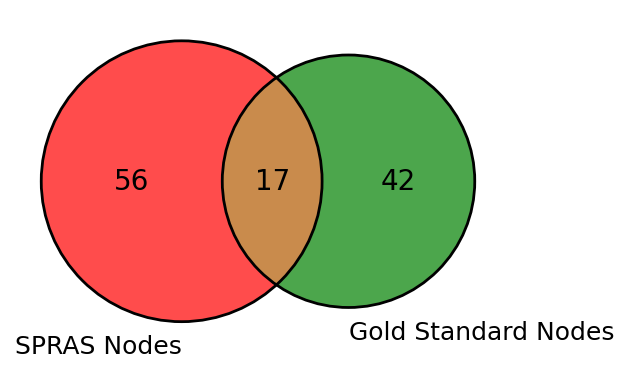

In [37]:
# depict venn diagram 
venn = venn2(subsets=(56,42,17),  
      set_labels=('SPRAS Nodes', 'Gold Standard Nodes'), 
      set_colors=("red","green"), alpha=0.7) 
  
# add outline 
venn2_circles(subsets=(56,42,17),  
              linestyle="solid",  
              linewidth=2) 


for text in venn.set_labels:
    text.set_fontsize(18)  # Set the desired font size

for text in venn.subset_labels:
    text.set_fontsize(20)  # Set the desired font size
plt.show() 
# assign title of the venn diagram 
plt.show() 

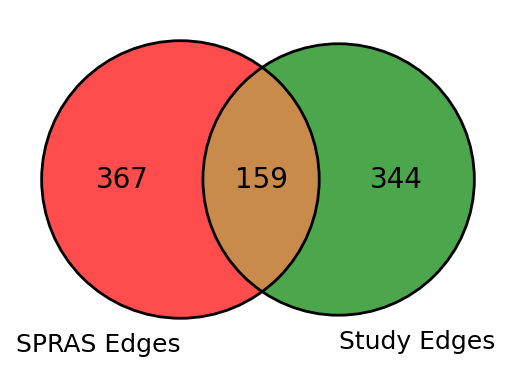

In [38]:
# depict venn diagram 
venn = venn2(subsets=(367,344,159),  
      set_labels=('SPRAS Edges', 'Study Edges'), 
      set_colors=("red", "green"), alpha=0.7) 
  
# add outline 
venn2_circles(subsets=(367,344,159),  
              linestyle="solid",  
              linewidth=2) 
  



for text in venn.set_labels:
    text.set_fontsize(18)  # Set the desired font size

for text in venn.subset_labels:
    text.set_fontsize(20)  # Set the desired font size
plt.show() 